In [31]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

In [32]:
i_path = "33.jpg"
img = cv2.imread(i_path)

# Поиск границ с помощью детектора Кэнни и морфологических операций


In [64]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
g_blur = cv2.GaussianBlur(gray, (3, 3), 0)
edge = cv2.Canny(g_blur, 50, 200) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
close = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)

### Отображение промежуточного результата работы

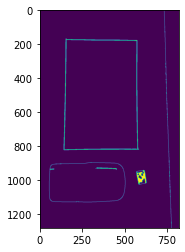

In [65]:
plt.imshow(close)
plt.show()

### Поиск контуров на объекте

In [73]:
contours, hierarchy = cv2.findContours(close.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
_, binary_img = cv2.threshold(img, 150, 250, cv2.THRESH_BINARY)
gray_binary = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)
for cnt in contours: 
    approx = cv2.approxPolyDP(cnt, 0.0005 * cv2.arcLength(cnt, True), True) 
    cv2.drawContours(gray_binary, approx, -1, (0, 0, 0), 5)
    cv2.fillPoly(gray_binary, pts=[approx], color=(0, 0, 0))


### Отображение результата

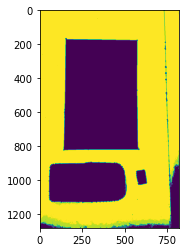

In [74]:
plt.imshow(gray_binary)

### Вычисление площади

In [77]:
def FindSquare(contours):
    squareoffigure = 0  
    objectsummarysquare = 0 
    for c in contours:   
        if squareoffigure == 0:
            squareoffigure = cv2.contourArea(c)
        else:
            objectsummarysquare = cv2.contourArea(c) 
    if objectsummarysquare < squareoffigure:
        return True
    elif objectsummarysquare > squareoffigure:
        return False
    else:
        return False

### Вывод результата

In [79]:
print( FindSquare(contours) )

True
